In [2]:
%matplotlib notebook

In [3]:
# import dependencies
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# add 2011 crime data
homicide = pd.read_csv("Data/homicide.csv", encoding="utf-8") 
homicide.head()

,CASE #,Date of Occurance,Primary Description,Description,Beat,Ward,Year,Latitude,Longitude,Month
0,HT405253,7/19/2011,HOMICIDE,FIRST DEGREE MURDER,732,6.0,2011,41.766565,-87.638386,7
1,HT578691,11/7/2011,HOMICIDE,FIRST DEGREE MURDER,2123,4.0,2011,41.822200,-87.602135,11
2,HT576092,11/5/2011,HOMICIDE,FIRST DEGREE MURDER,1122,28.0,2011,41.877169,-87.719061,11
3,HT581763,11/9/2011,HOMICIDE,FIRST DEGREE MURDER,522,34.0,2011,41.688889,-87.628242,11
4,HT582731,11/10/2011,HOMICIDE,FIRST DEGREE MURDER,614,18.0,2011,41.741304,-87.659690,11


In [5]:
year_group = homicide.groupby("Year")
year_plot = year_group['CASE #'].count().reset_index()
year_plot

,Year,CASE #
0,2001,667
1,2006,477
2,2011,438
3,2016,788
4,2020,813


<IPython.core.display.Javascript object>


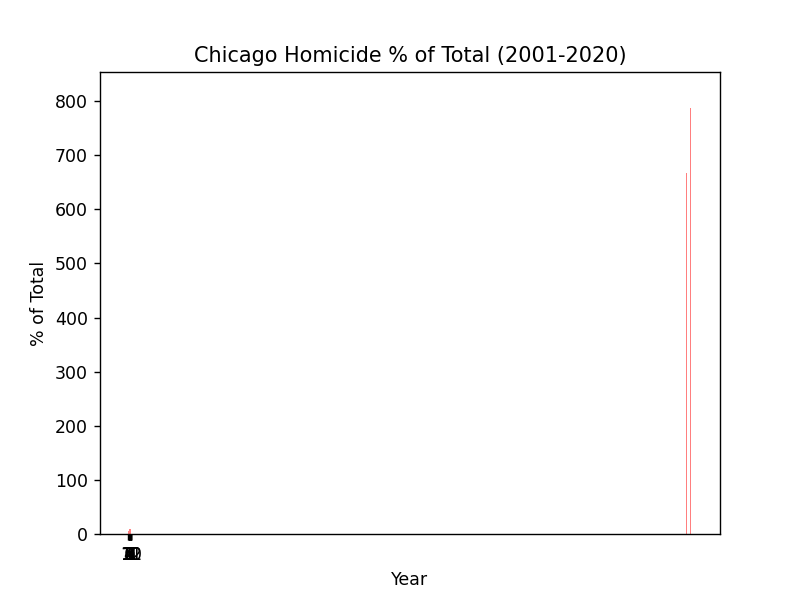

In [6]:
# set the coordiantes for the graph
y_axis = year_plot['CASE #']
x_axis = year_plot['Year']

#plot the graph
plt.bar(x_axis, y_axis, color='r', alpha=.5, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)

# Give our chart some labels and a tile
plt.title("Chicago Homicide Trend by Year")
plt.xlabel("Year")
plt.ylabel("Number of Homicides")
plt.show()

In [7]:
# group by month
month_group = homicide.groupby("Month")
month_group = month_group['CASE #'].count().reset_index()

# calculate month percentages
seasonality = month_group['CASE #'] / month_group['CASE #'].sum()
seasonality.reset_index()
month_group['percent'] = seasonality*100
month_group.style.format({'percent':'{:,0.0%} '.format})

month_group

,Month,CASE #,percent
0,1,206,6.471882
1,2,151,4.743952
2,3,185,5.812127
3,4,221,6.943135
4,5,277,8.702482
5,6,333,10.461828
6,7,380,11.938423
7,8,289,9.079485
8,9,315,9.896324
9,10,306,9.613572


In [8]:
# set the coordiantes for the graph
y_axis = month_group['percent']
x_axis = month_group['Month']

#plot the graph
plt.bar(x_axis, y_axis, color='r', alpha=.5, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)

# Give our chart some labels and a tile
plt.title("Chicago Homicide % of Total (2001-2020)")
plt.xlabel("Year")
plt.ylabel("% of Total")
plt.show()

In [9]:
# group by ward
ward_group = homicide.groupby("Ward")
ward_group = ward_group['CASE #'].count().reset_index()

# calculate month percentages
ward_distro = ward_group['CASE #'] / ward_group['CASE #'].sum()
ward_distro.reset_index()
ward_group['percent'] = ward_distro*100
ward_group.style.format({'percent':'{:,0.0%} '.format})
ward_sort = ward_group.sort_values(by=['percent'], ascending = False)

In [119]:
# plot histogram for Ward



In [ ]:
## the info below is not completely working; need to fix filter ##

In [53]:
# filter the dataframe to display only year we want to look at
data2020 = homicide.loc[homicide['Year'] == 2020]

# group by month
month20 = data2020.groupby('Month')
month20_count = month20['CASE #'].count().reset_index()

# Calculate % of total
percent_tot20 = month20_count['CASE #'] / month20_count['CASE #'].sum()
percent_tot20.reset_index()
month20_count['percent'] = percent_tot20
month20_count['year'] = 2020

In [54]:
# filter the dataframe to display only year we want to look at
data2016 = homicide.loc[homicide['Year'] == 2016]

# group by month
month16 = data2016.groupby('Month')
month16_count = month16['CASE #'].count().reset_index()

# Calculate % of total
percent_tot16 = month16_count['CASE #'] / month16_count['CASE #'].sum()
percent_tot16.reset_index()
month16_count['percent'] = percent_tot16
month16_count['year'] = 2016

In [56]:
# filter the dataframe to display only year we want to look at
data2011 = homicide.loc[homicide['Year'] == 2011]

# group by month
month11 = data2011.groupby('Month')
month11_count = month11['CASE #'].count().reset_index()

# Calculate % of total
percent_tot11 = month11_count['CASE #'] / month11_count['CASE #'].sum()
percent_tot11.reset_index()
month11_count['percent'] = percent_tot11
month11_count['year'] = 2011

In [58]:
# filter the dataframe to display only year we want to look at
data2006 = homicide.loc[homicide['Year'] == 2006]

# group by month
month06 = data2006.groupby('Month')
month06_count = month06['CASE #'].count().reset_index()

# Calculate % of total
percent_tot06 = month06_count['CASE #'] / month06_count['CASE #'].sum()
percent_tot06.reset_index()
month06_count['percent'] = percent_tot16
month06_count['year'] = 2006

In [59]:
# filter the dataframe to display only year we want to look at
data2001 = homicide.loc[homicide['Year'] == 2001]

# group by month
month01 = data2001.groupby('Month')
month01_count = month01['CASE #'].count().reset_index()

# Calculate % of total
percent_tot01 = month01_count['CASE #'] / month01_count['CASE #'].sum()
percent_tot01.reset_index()
month01_count['percent'] = percent_tot01
month01_count['year'] = 2001

In [62]:
# merge dataframes
frames = [month11_count, month16_count, month20_count, month06_count, month01_count]

count_merge = pd.concat(frames)

In [ ]:
# create trend graph

In [63]:
# Merge two dataframes using a left join
merge1 = pd.merge(month01_count, month06_count, on="Month", how="left")

# remove extra columns
merge1 = merge1.drop(columns=['year_x','CASE #_x','year_y','CASE #_y'])

# rename so data is consistent
merge1 = merge1.rename(columns={'percent_x':'2001',
                                'percent_y':'2006'}
                      )

## repeat steps to add in other years

# Merge two dataframes using a left join
merge2 = pd.merge(merge1, month11_count, on="Month", how="left")

# remove extra columns
merge2 = merge2.drop(columns=['year','CASE #'])

# rename so data is consistent
merge2 = merge2.rename(columns={'percent':'2011'})

# Merge two dataframes using a left join
merge3 = pd.merge(merge2, month16_count, on="Month", how="left")

# remove extra columns
merge3 = merge3.drop(columns=['year','CASE #'])

# rename so data is consistent
merge3 = merge3.rename(columns={'percent':'2016'})

# Merge two dataframes using a left join
percent_chart = pd.merge(merge3, month20_count, on="Month", how="left")

# remove extra columns
percent_chart = percent_chart.drop(columns=['year','CASE #'])

# rename so data is consistent
percent_chart = percent_chart.rename(columns={'percent':'2020'})

percent_chart

,Month,2001,2006,2011,2016,2020
0,1,0.062969,0.068528,0.063927,0.063927,0.065191
1,2,0.040480,0.059645,0.054795,0.054795,0.044280
2,3,0.055472,0.057107,0.052511,0.052511,0.055351
3,4,0.088456,0.050761,0.068493,0.068493,0.067651
4,5,0.062969,0.087563,0.086758,0.086758,0.105781
5,6,0.103448,0.101523,0.102740,0.102740,0.115621
6,7,0.116942,0.088832,0.125571,0.125571,0.136531
7,8,0.086957,0.121827,0.082192,0.082192,0.082411
8,9,0.106447,0.082487,0.091324,0.091324,0.100861
9,10,0.106447,0.105330,0.100457,0.100457,0.082411
